In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_excel('master_data.xlsx')
df.columns

Index(['dice_AC_L1', 'hd_AC_L1', 'assd_AC_L1', 'vol_AC_L1', 'vol_err_AC_L1',
       'dice_AC_L5', 'hd_AC_L5', 'assd_AC_L5', 'vol_AC_L5', 'vol_err_AC_L5',
       'dice_AC_L10', 'hd_AC_L10', 'assd_AC_L10', 'vol_AC_L10',
       'vol_err_AC_L10', 'dice_DICE', 'hd_DICE', 'assd_DICE', 'vol_DICE',
       'vol_err_DICE', 'dice_DOF', 'hd_DOF', 'assd_DOF', 'vol_DOF',
       'vol_err_DOF', 'dice_WCE', 'hd_WCE', 'assd_WCE', 'vol_WCE',
       'vol_err_WCE', 'dice_CE', 'hd_CE', 'assd_CE', 'vol_CE', 'vol_err_CE',
       'phase', 'struc', 'filename'],
      dtype='object')

In [24]:
df_dice = df.loc[:, ['dice_AC_L1','dice_AC_L5','dice_AC_L10','dice_DICE','dice_DOF','dice_WCE','dice_CE',"phase"]]
# pd.melt(df_dice)
df_dice

,dice_AC_L1,dice_AC_L5,dice_AC_L10,dice_DICE,dice_DOF,dice_WCE,dice_CE,phase
0,0.962101,0.972590,0.971119,0.972879,0.968458,0.972470,0.972051,ED
1,0.880246,0.918689,0.881196,0.836482,0.874131,0.879982,0.900398,ED
2,0.858248,0.875432,0.890098,0.863177,0.888856,0.880170,0.873611,ED
3,0.958629,0.961646,0.965920,0.961684,0.957315,0.963442,0.959424,ES
4,0.780564,0.780244,0.761928,0.666733,0.700601,0.746151,0.791234,ES
...,...,...,...,...,...,...,...,...
115,0.879198,0.886124,0.907017,0.942158,0.928900,0.937901,0.928547,ED
116,0.882041,0.890713,0.888109,0.889743,0.884327,0.895991,0.896763,ED
117,0.915100,0.925236,0.940734,0.930072,0.913600,0.944557,0.934069,ES
118,0.759361,0.794652,0.825231,0.856663,0.822691,0.857034,0.867354,ES


Text(0.5, 1.0, 'Pengukuran HD secara 3D')

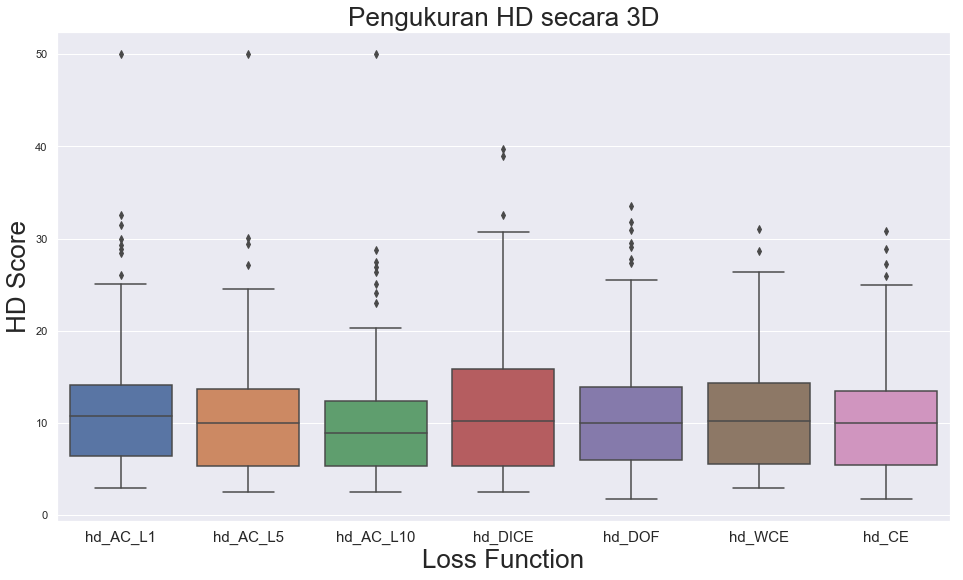

In [50]:
df_dice = df.loc[:, ['hd_AC_L1','hd_AC_L5','hd_AC_L10','hd_DICE','hd_DOF','hd_WCE','hd_CE']]

fontsize=26
plt.figure(figsize=(16,9))
sns.boxplot(x="variable",y="value", data=pd.melt(df_dice))
plt.xlabel("Loss Function", fontsize=fontsize)
plt.xticks(fontsize=15)
# plt.legend(fontsize=fontsize)
plt.ylabel("HD Score", fontsize=fontsize)
plt.title("Pengukuran HD secara 3D", fontsize=fontsize)

In [4]:
df_delta_ac_dice= df.loc[:, ['dice_AC_L10','dice_DICE','filename']]
df_delta_ac_dice['Score_diff'] = df_delta_ac_dice['dice_AC_L10'] - df_delta_ac_dice['dice_DICE'] 
df_delta_ac_dice

,dice_AC_L10,dice_DICE,filename,Score_diff
0,0.971119,0.972879,patient005_ED.nii.gz,-0.001760
1,0.881196,0.836482,patient005_ED.nii.gz,0.044714
2,0.890098,0.863177,patient005_ED.nii.gz,0.026921
3,0.965920,0.961684,patient005_ES.nii.gz,0.004236
4,0.761928,0.666733,patient005_ES.nii.gz,0.095195
...,...,...,...,...
115,0.907017,0.942158,patient100_ED.nii.gz,-0.035141
116,0.888109,0.889743,patient100_ED.nii.gz,-0.001634
117,0.940734,0.930072,patient100_ES.nii.gz,0.010662
118,0.825231,0.856663,patient100_ES.nii.gz,-0.031432


In [5]:
df_delta_ac_dice.loc[df_delta_ac_dice['Score_diff'].idxmax()]

dice_AC_L10                0.929351
dice_DICE                  0.716035
filename       patient065_ES.nii.gz
Score_diff                 0.213315
Name: 76, dtype: object

In [6]:
df_delta_ac_dice[df_delta_ac_dice['Score_diff']==df_delta_ac_dice['Score_diff'].max()]

,dice_AC_L10,dice_DICE,filename,Score_diff
76,0.929351,0.716035,patient065_ES.nii.gz,0.213315


In [7]:
asd = '75%'
var = 'dice_AC_L1'
for var in df_dice.columns:
    q1 = df[var].quantile(q=0.25)
    q3 = df[var].quantile(q=0.75)
    whisker_range = 1.5*(q3-q1)
    print(var)
    print(q3, '-', q1,'=', q3-q1)
    print(whisker_range)
#     print(q1 - whisker_range)
#     print(q3 + whisker_range)

dice_AC_L10
0.9468297375 - 0.8695562967499999 = 0.07727344075000009
0.11591016112500013
dice_DICE
0.946192640687704 - 0.850383666630471 = 0.09580897405723299
0.14371346108584948
dice_DOF
0.9487367761052538 - 0.854133094855254 = 0.09460368124999974
0.1419055218749996
dice_WCE
0.94326397 - 0.871148351 = 0.07211561899999996
0.10817342849999995
dice_CE
0.9473772163711642 - 0.8653829780984401 = 0.08199423827272412
0.12299135740908618


In [29]:
pd.melt(df_hd, value_vars='phase')

,variable,value
0,phase,ED
1,phase,ED
2,phase,ED
3,phase,ES
4,phase,ES
...,...,...
115,phase,ED
116,phase,ED
117,phase,ES
118,phase,ES


Text(0, 0.5, 'Hausdorff Distance Score')

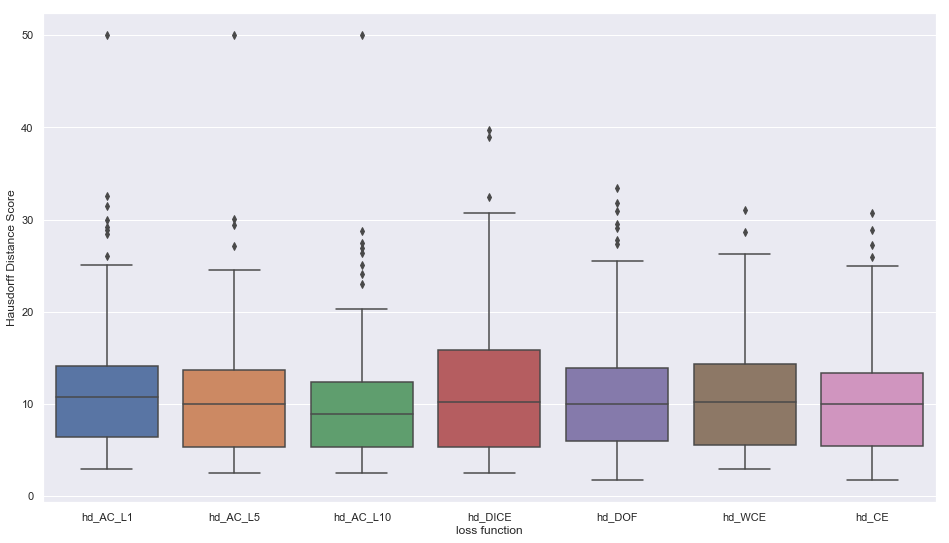

In [32]:
df_hd = df.loc[:, ['hd_AC_L1','hd_AC_L5','hd_AC_L10','hd_DICE','hd_DOF','hd_WCE','hd_CE']]

plt.figure(figsize=(16,9))
sns.boxplot(x="variable", y="value",data=pd.melt(df_hd))
plt.xlabel("loss function")
plt.ylabel("Hausdorff Distance Score")

In [37]:
df_hd = df.loc[:, ['hd_AC_L1','hd_AC_L5','hd_AC_L10','hd_DICE','hd_DOF','hd_WCE','hd_CE','phase']]

df_hd

,hd_AC_L1,hd_AC_L5,hd_AC_L10,hd_DICE,hd_DOF,hd_WCE,hd_CE,phase
0,5.798117,5.070306,5.070306,5.966213,10.000000,4.446953,4.446953,ED
1,14.311169,12.015005,12.778155,18.149229,15.210919,19.716001,13.747336,ED
2,10.387981,10.387981,7.954951,10.195836,10.387981,10.387981,10.387981,ED
3,5.966213,9.433412,7.954951,10.983164,10.983164,6.288941,10.000000,ES
4,25.087737,18.149229,17.483251,24.449006,29.067960,26.318734,27.252526,ES
...,...,...,...,...,...,...,...,...
115,11.970070,10.670072,11.768784,10.171657,10.086194,11.768784,10.340465,ED
116,11.970070,5.263160,4.744149,19.505670,13.847710,10.340465,22.397821,ED
117,10.000000,10.000000,10.000000,2.942196,18.782181,2.942196,3.721616,ES
118,13.546888,10.670072,11.068286,11.602847,11.300480,10.423844,10.000000,ES


In [38]:
pd.melt(df_hd, id_vars='phase')

,phase,variable,value
0,ED,hd_AC_L1,5.798117
1,ED,hd_AC_L1,14.311169
2,ED,hd_AC_L1,10.387981
3,ES,hd_AC_L1,5.966213
4,ES,hd_AC_L1,25.087737
...,...,...,...
835,ED,hd_CE,10.340465
836,ED,hd_CE,22.397821
837,ES,hd_CE,3.721616
838,ES,hd_CE,10.000000


Text(0, 0.5, 'Hausdorff Distance Score')

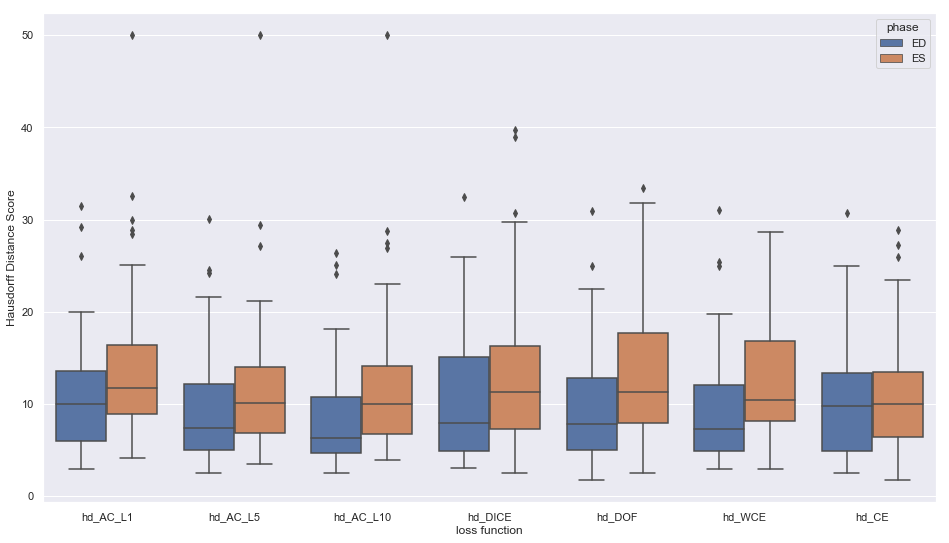

In [40]:
plt.figure(figsize=(16,9))
sns.boxplot(x="variable", y="value",hue="phase", data=pd.melt(df_hd, id_vars='phase'))
plt.xlabel("loss function")
plt.ylabel("Hausdorff Distance Score")

Text(0, 0.5, 'ASSD Score')

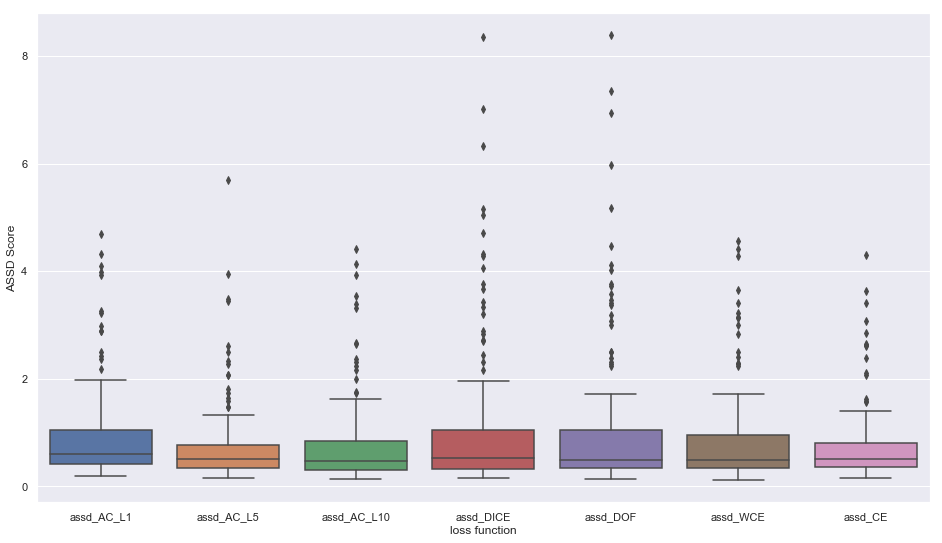

In [9]:
df_assd = df.loc[:, ['assd_AC_L1','assd_AC_L5','assd_AC_L10','assd_DICE','assd_DOF','assd_WCE','assd_CE']]

plt.figure(figsize=(16,9))
sns.boxplot(x="variable", y="value", data=pd.melt(df_assd))
plt.xlabel("loss function")
plt.ylabel("ASSD Score")

Text(0, 0.5, 'volume')

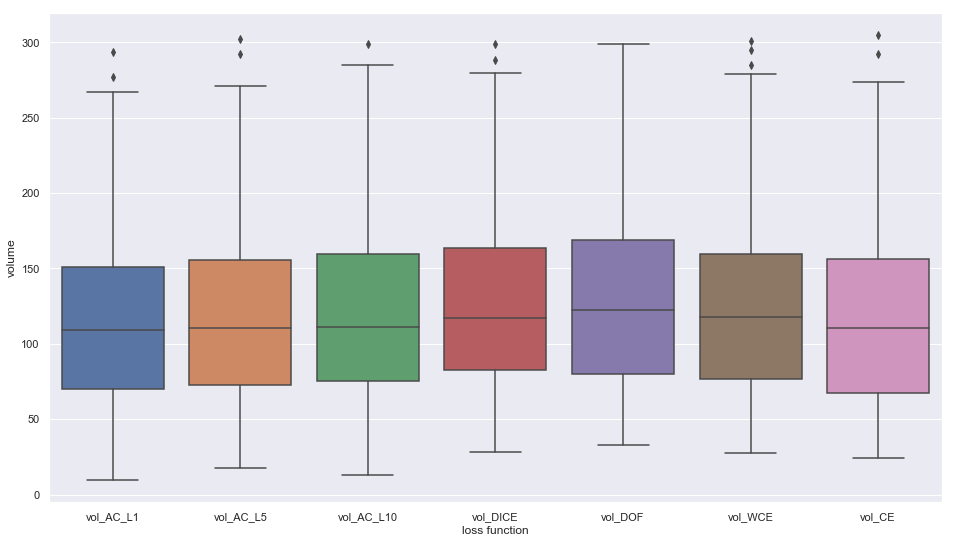

In [10]:
df_vol = df.loc[:, ['vol_AC_L1','vol_AC_L5','vol_AC_L10','vol_DICE','vol_DOF','vol_WCE','vol_CE']]

plt.figure(figsize=(16,9))
sns.boxplot(x="variable", y="value", data=pd.melt(df_vol))
plt.xlabel("loss function")
plt.ylabel("volume")

NameError: name 'ticks' is not defined

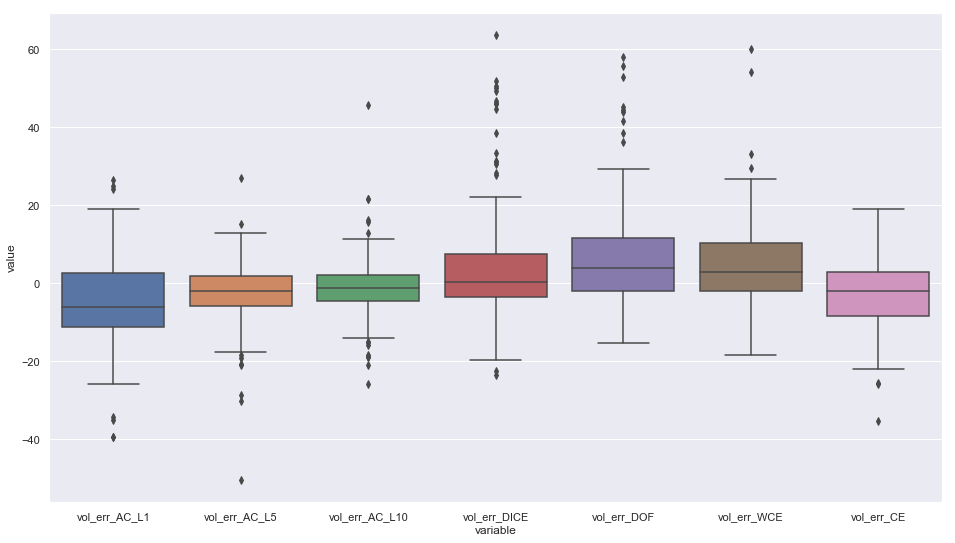

In [11]:
df_vol_err = df.loc[:, ['vol_err_AC_L1','vol_err_AC_L5','vol_err_AC_L10','vol_err_DICE','vol_err_DOF','vol_err_WCE','vol_err_CE']]

plt.figure(figsize=(16,9))
sns.boxplot(x="variable", y="value", data=pd.melt(df_vol_err))
# plt.xticks(ticks)
plt.xlabel("loss function")
plt.ylabel("volume")

ValueError: Could not interpret input 'dice'

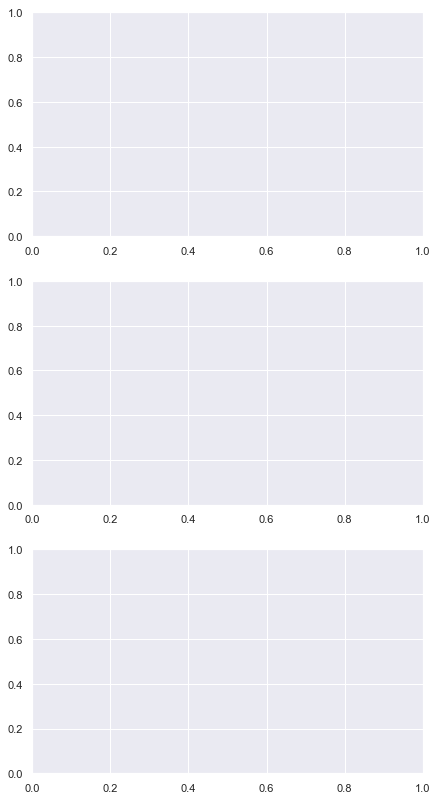

In [14]:
fig, axes = plt.subplots(3, 1)
fig.set_figheight(14)
fig.set_figwidth(7)
sns.boxplot(x='struc', y='dice', hue='phase', data=df, palette="PRGn", ax=axes[0])
sns.boxplot(x='struc', y='hd', hue='phase', data=df, palette="PRGn", ax=axes[1])
sns.boxplot(x='struc', y='assd', hue='phase', data=df, palette="PRGn", ax=axes[2])